In [2]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [3]:
count = 0
dirs = os.listdir(r'C:\Users\ASUS\Documents\dataset\Alex net\train')
for i in dirs:
    files = list(os.listdir(r'C:\Users\ASUS\Documents\dataset\Alex net\train' + '/' + i))
    count += len(files)
    print(i + ' punya ' + str(len(files)) + ' images')
print('Total gambar dalam folder: ', count)

jahe punya 100 images
kunyit punya 100 images
lengkuas punya 100 images
Total gambar dalam folder:  300


In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = r"C:\Users\ASUS\Documents\dataset\Alex net\train"
validation_dir = r"C:\Users\ASUS\Documents\dataset\Alex net\validation"
test_dir = r"C:\Users\ASUS\Documents\dataset\Alex net\test" 

os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

categories = [name for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]

validation_split = 0.1  # 10% untuk validasi
test_split = 0.1        # 10% untuk test
train_split = 1 - validation_split - test_split  # 80% untuk train

for category in categories:
    category_dir = os.path.join(base_dir, category)
    validation_category_dir = os.path.join(validation_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    
    os.makedirs(validation_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)
    
    all_files = os.listdir(category_dir)
    
    train_val_files, test_files = train_test_split(all_files, test_size=test_split, random_state=42)
    
    train_files, val_files = train_test_split(train_val_files, test_size=validation_split / (train_split + validation_split), random_state=42)
    
    for file in val_files:
        shutil.move(os.path.join(category_dir, file), os.path.join(validation_category_dir, file))
    
    for file in test_files:
        shutil.move(os.path.join(category_dir, file), os.path.join(test_category_dir, file))

print("Dataset berhasil dibagi menjadi train, validation, dan test!")


Dataset berhasil dibagi menjadi train, validation, dan test!


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    r"train",
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    r'validation',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r'test',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical'
)

Found 240 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


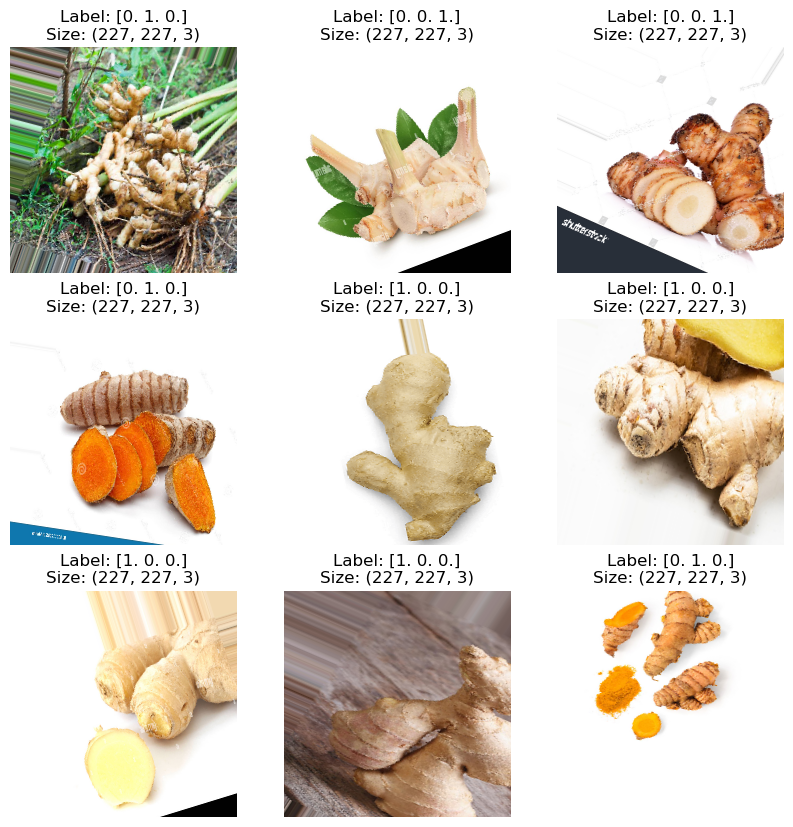

In [6]:
sample_batch = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(min(9, len(sample_batch[0]))):
    image = sample_batch[0][i]
    label = sample_batch[1][i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {label}\nSize: {image.shape}")
    plt.axis('off')
plt.show()

In [7]:
model = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    
    Flatten(),

    
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')
])


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'] 
)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,293,635 (222.37 MB)

 Trainable params: 58,293,635 (222.37 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=4,
                               restore_best_weights=True)

In [11]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3164 - loss: 1.1078 - val_accuracy: 0.3333 - val_loss: 1.1013
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3872 - loss: 1.0827 - val_accuracy: 0.4667 - val_loss: 1.0513
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5037 - loss: 1.0088 - val_accuracy: 0.4333 - val_loss: 1.1171
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4726 - loss: 0.9442 - val_accuracy: 0.5667 - val_loss: 0.9019
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5817 - loss: 0.9011 - val_accuracy: 0.5000 - val_loss: 0.7816
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5403 - loss: 0.8573 - val_accuracy: 0.5000 - val_loss: 0.8945
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5775 - loss: 0.9364 - val_accuracy: 0.6333 - val_loss: 0.7763
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5939 - loss: 0.8170 - val_accuracy: 0.6000 - val_loss: 0.6924
Epoch 9/

In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step - accuracy: 0.6000 - loss: 0.7922
Test Loss: 0.7921562194824219
Test Accuracy: 0.6000000238418579


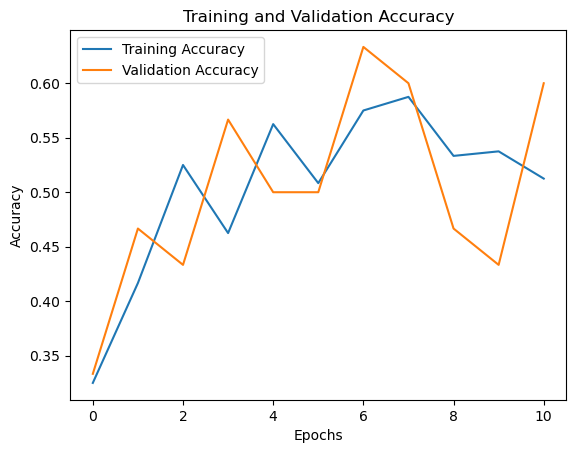

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


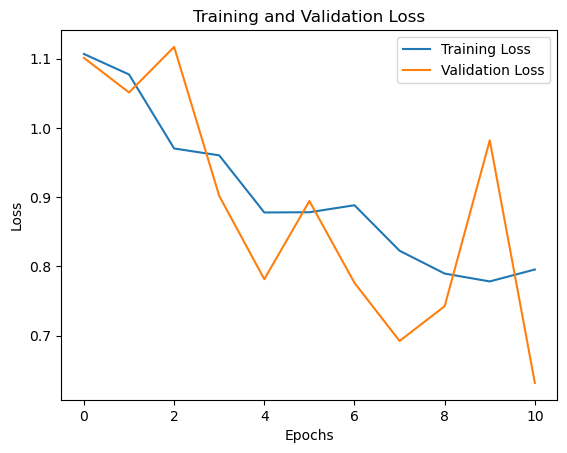

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:

model.save('Alexnet.h5')

Found 30 images belonging to 3 classes.


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.7922
Test Loss: 0.7921561598777771
Test Accuracy: 0.6000000238418579
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


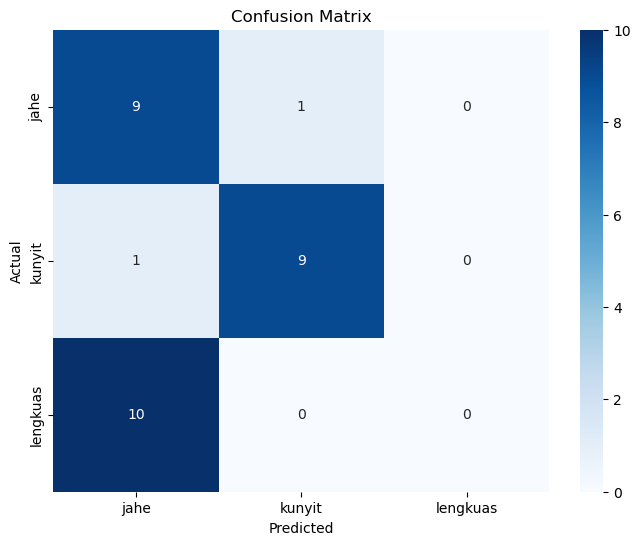

Classification Report:
              precision    recall  f1-score   support

        jahe       0.45      0.90      0.60        10
      kunyit       0.90      0.90      0.90        10
    lengkuas       0.00      0.00      0.00        10

    accuracy                           0.60        30
   macro avg       0.45      0.60      0.50        30
weighted avg       0.45      0.60      0.50        30



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    r'test',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    shuffle=False 
)

model = load_model('Alexnet.h5')


test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Prediksi pada data test
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)
